In [3]:
import warnings 
warnings.filterwarnings('ignore')

# 1. Read the column description and ensure you understand 
# each attribute well

In [4]:
import pandas as pd
import numpy as np
#cols = ['sepal length in cm' , 'sepal width in cm', 'petal length in cm' , 'petal width in cm', 'class']
DF_PL = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
DF_PL.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
DF_PL.shape

(5000, 14)

In [7]:
cols = DF_PL.columns.tolist()
cols = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
DF_PL = DF_PL[cols]
DF_PL.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


# 2. Study the data distribution in each attribute, share your findings. (5 points)

In [8]:
DF_PL.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [9]:
DF_PL.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

In [10]:
DF_PL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


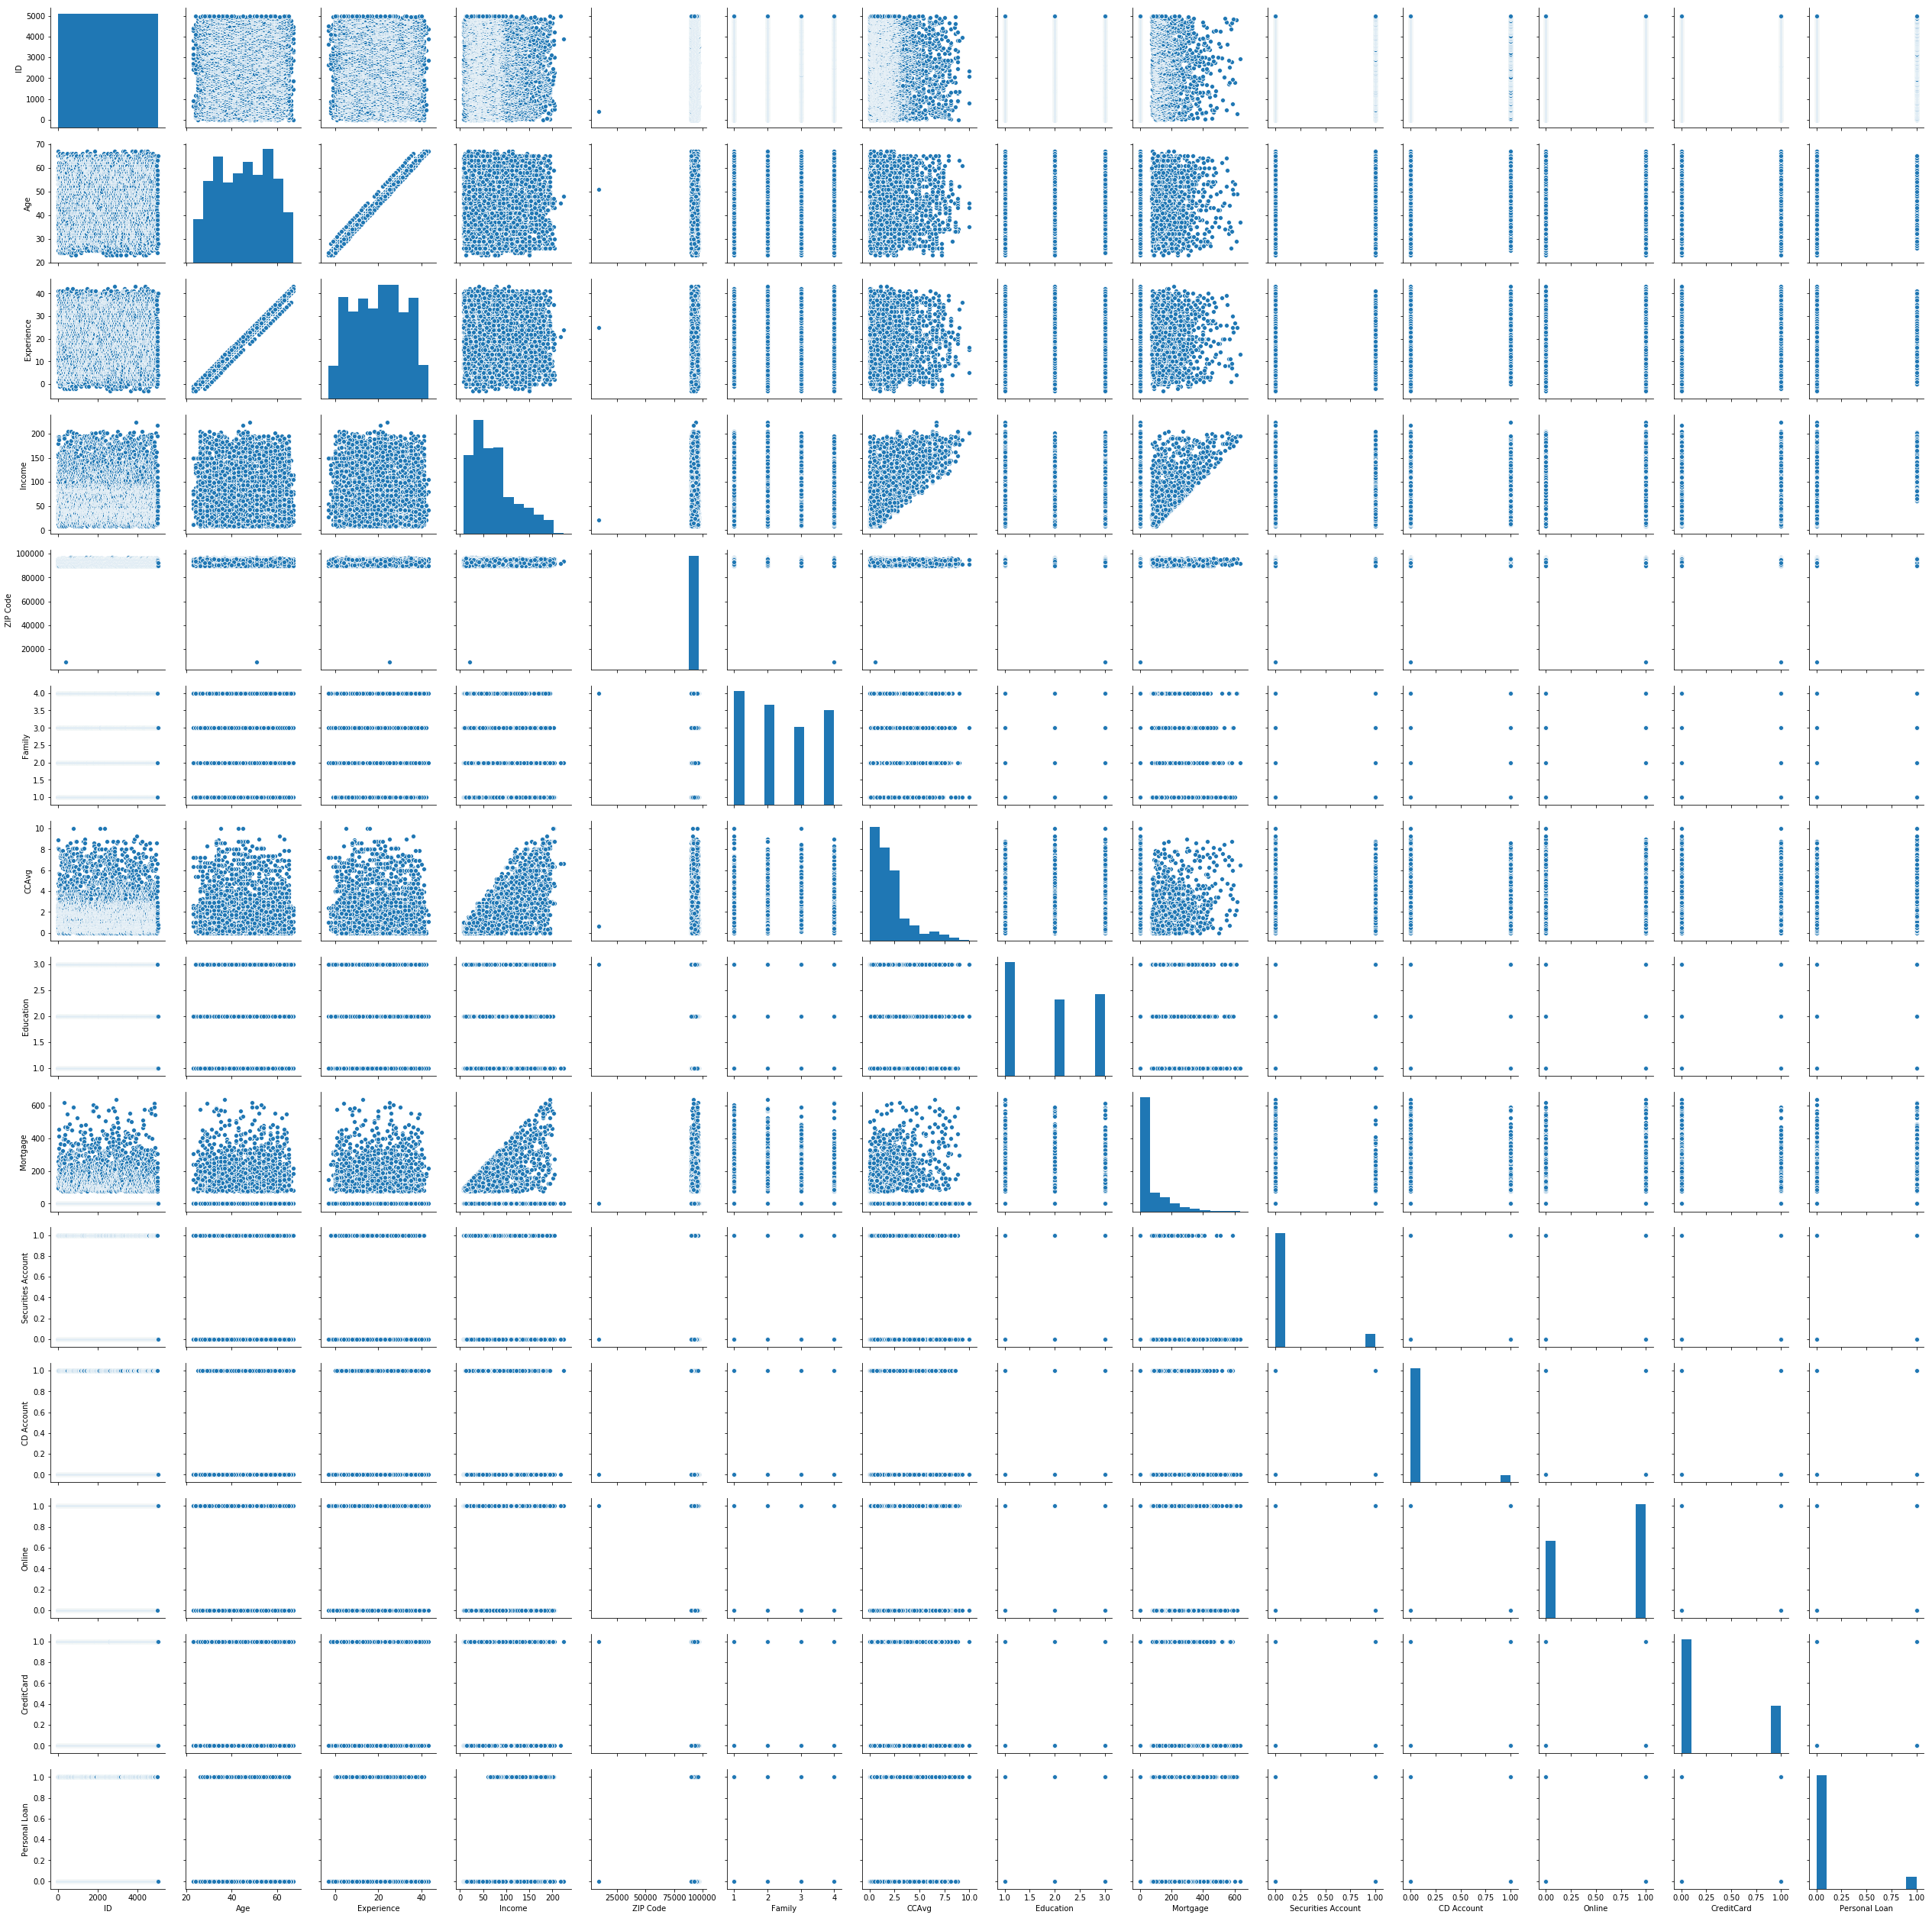

In [11]:
import seaborn as sns
#sns.pairplot(DF_PL[['CreditCard','Personal Loan']])
sns.pairplot(DF_PL)

In [12]:
DF_PL.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


In [13]:
DF_PL.groupby('Personal Loan').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Findings: 
1. All data are avaiable and No missing values 
2. 'Personal Loan' will be taken as Target class and other column will be the independent variable .
3. Based on the corellation vavlue which are  under -0.1 to 0.1 can be removed from the feature set for modelling as they have negligible influence on the target class . So the below columns can be dropped :

'ID', 'Age', 'Experience', 'ZIP Code', 'Family', 'Securities Account', 'Online', 'CreditCard'


In [14]:
DF_PL_Drop = DF_PL.copy()
DF_PL_Drop = DF_PL.drop(['ID', 'Age', 'Experience', 'ZIP Code', 'Family', 'Securities Account', 'Online', 'CreditCard'],axis=1)

In [15]:
DF_PL_Drop.corr()

,Income,CCAvg,Education,Mortgage,CD Account,Personal Loan
Income,1.000000,0.645984,-0.187524,0.206806,0.169738,0.502462
CCAvg,0.645984,1.000000,-0.136124,0.109905,0.136534,0.366889
Education,-0.187524,-0.136124,1.000000,-0.033327,0.013934,0.136722
Mortgage,0.206806,0.109905,-0.033327,1.000000,0.089311,0.142095
CD Account,0.169738,0.136534,0.013934,0.089311,1.000000,0.316355
Personal Loan,0.502462,0.366889,0.136722,0.142095,0.316355,1.000000


Based on the above observation, data is cleaned and available for all columns and based on the correlatio we need to drop columns which are under -0.1 to 0.1 against the target variable which is 'Personal Loan' in this case .

# 3. Get the target column distribution. Your comments (5 points)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012EA0358>]],
      dtype=object)

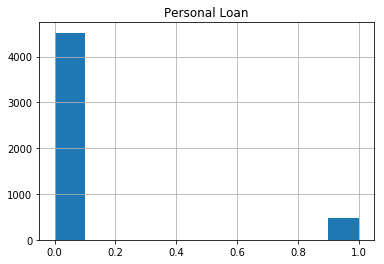

In [18]:
DF_PL_Drop.hist('Personal Loan')


In [19]:
DF_PL_Drop.groupby(["Personal Loan"]).count()*100/5000


,Income,CCAvg,Education,Mortgage,CD Account
Personal Loan,,,,,
0,90.4,90.4,90.4,90.4,90.4
1,9.6,9.6,9.6,9.6,9.6


Answer: Findings : From the given data set, about 10 % only opted for personal loan and 90% of the population have not taken personal loan 

# 4. Split the data into training and test set in the ratio of 70:30 respectively ( 5 points)

In [60]:
from sklearn.model_selection import train_test_split

X = DF_PL_Drop.drop("Personal Loan", axis=1)
y = DF_PL_Drop["Personal Loan"]

In [61]:
test_size = 0.30 # taking 80:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (25 points)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, f1_score ,roc_curve
from sklearn.model_selection import train_test_split



In [63]:
def modelPerformanceAnalysis(model):
   # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
    roc_auc = auc(fpr, tpr)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score, roc_auc]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score, roc_auc]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score", "auc"])
    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score, roc_auc]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score, roc_auc]
    # Concatenate Train and Test results to resultsDf
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)

In [85]:
model_LR = LogisticRegression()
model_GNB = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors= 3)
## The k is taken as 3 considering the fact that the most closest value will be predicted .



In [86]:
modelPerformanceAnalysis(model_LR)

,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.30,0.30
accuracy,0.94,0.95,0.94,0.94
recall,0.53,0.55,0.67,0.69
precision,0.83,0.83,0.69,0.69
f1_score,0.65,0.66,0.68,0.69
auc,0.94,0.94,0.94,0.94


In [87]:
y_predtest = model_LR.predict(X_test)
metrics.confusion_matrix(y_predtest, y_test)

array([[1346,   62],
       [  16,   76]], dtype=int64)

In [88]:
modelPerformanceAnalysis(model_GNB)

,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.08,0.08
accuracy,0.88,0.88,0.87,0.87
recall,0.56,0.60,0.80,0.81
precision,0.42,0.40,0.41,0.39
f1_score,0.48,0.48,0.54,0.53
auc,0.92,0.92,0.92,0.92


In [89]:
y_predtest = model_GNB.predict(X_test)
metrics.confusion_matrix(y_predtest, y_test)

array([[1236,   55],
       [ 126,   83]], dtype=int64)

In [90]:
modelPerformanceAnalysis(model_KNN)

,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,3500.00,1500.00,3500.00,1500.00
optimalTh,0.50,0.50,0.33,0.33
accuracy,0.95,0.93,0.95,0.93
recall,0.67,0.49,0.67,0.49
precision,0.84,0.64,0.84,0.64
f1_score,0.74,0.55,0.74,0.55
auc,0.98,0.98,0.98,0.98


# 6. Print the confusion matrix for all the above models (10 points)

In [95]:
print('confusion matrix for KNN Model')
y_predtest = model_KNN.predict(X_test)
metrics.confusion_matrix(y_predtest, y_test)

confusion matrix for KNN Model


array([[1325,   71],
       [  37,   67]], dtype=int64)

In [96]:
print('confusion matrix for Logistic Model')
y_predtest = model_LR.predict(X_test)
metrics.confusion_matrix(y_predtest, y_test)

confusion matrix for Logistic Model


array([[1346,   62],
       [  16,   76]], dtype=int64)

In [97]:
print('confusion matrix for Naïve Bayes Model')
y_predtest = model_GNB.predict(X_test)
metrics.confusion_matrix(y_predtest, y_test)

confusion matrix for Naïve Bayes Model


array([[1236,   55],
       [ 126,   83]], dtype=int64)

# 7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

# Answer : Based on the accuracy and F1 score the best model will be Logistic regression Model